In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/winequality.csv

--2022-04-08 12:36:02--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/winequality.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.158
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/csv]
Saving to: ‘winequality.csv.1’

winequality.csv.1   100%[===================>]  98.58K   554KB/s    in 0.2s    

2022-04-08 12:36:02 (554 KB/s) - ‘winequality.csv.1’ saved [100951/100951]



In [5]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('winequality.csv') 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df['quality'].value_counts()  

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
df.replace({'quality':{3:5,4:5,8:7}}, inplace=True)

In [10]:
df['quality'].value_counts()  

5    744
6    638
7    217
Name: quality, dtype: int64

In [11]:
# number of missing values in each column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##EDA

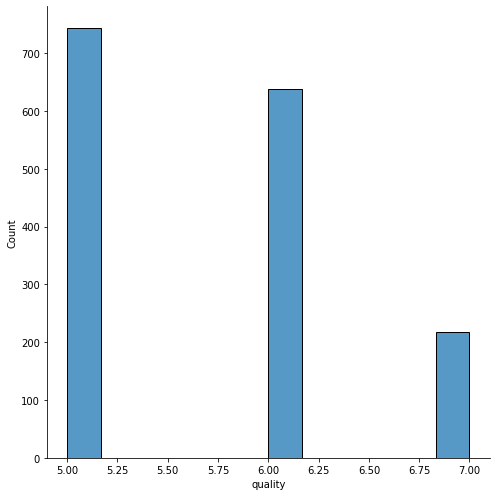

In [13]:
### esplorazione target con displot
sns.displot(df["quality"], height =7,aspect=1) 
plt.show()

In [17]:
sns.pairplot(df,hue='quality')

Output hidden; open in https://colab.research.google.com to view.

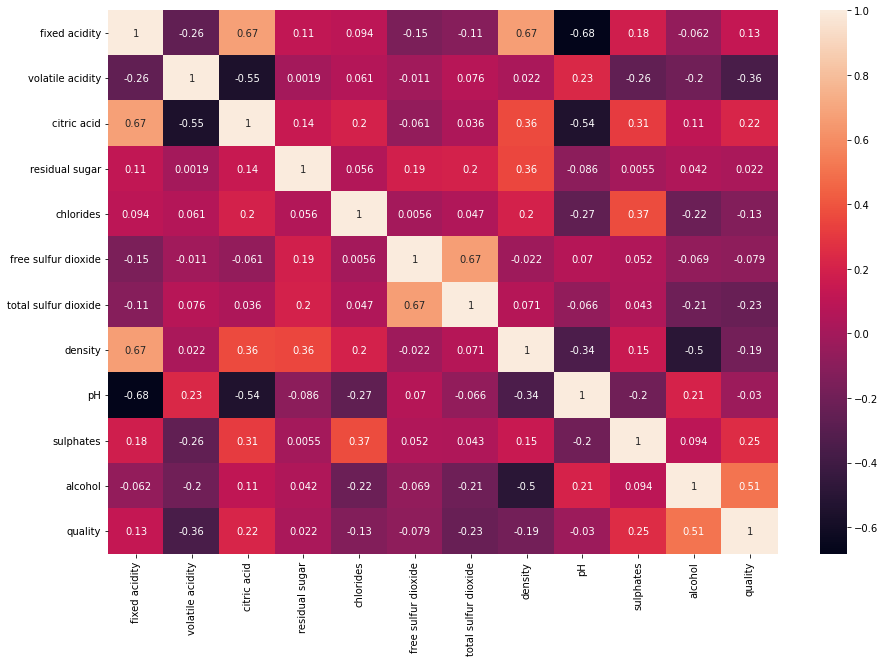

In [16]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True); 

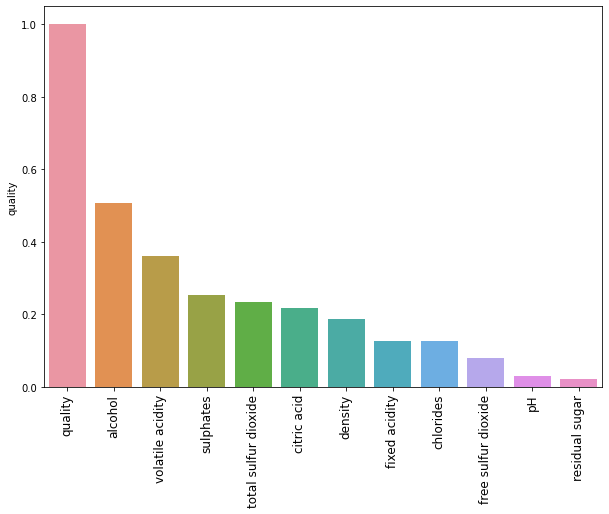

In [19]:
# grafico di correlazione delle Features bar plot
price_corr = df.corr() ["quality"].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [20]:
# separating the data and label
X_ = df.drop(columns=['quality'],axis=1)
y = df['quality']

In [21]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
X = standardized_data

##SPLIT

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

##FEATURE IMPORTANCES CON RANDOM FOREST

In [23]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=10)

In [24]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=667)

Text(0.5, 0, 'Relative Importance')

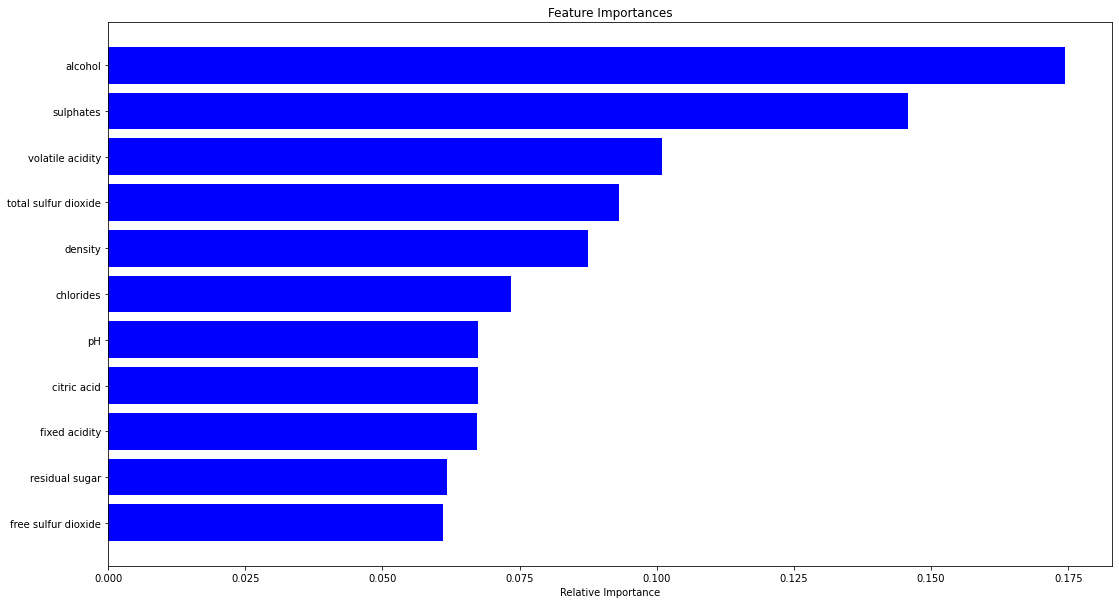

In [25]:
#Feature importance for Random Forest
features = X_.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

>1, train: 0.590, test: 0.613
>2, train: 0.625, test: 0.637
>3, train: 0.655, test: 0.650
>4, train: 0.700, test: 0.647
>5, train: 0.744, test: 0.662
>6, train: 0.810, test: 0.641
>7, train: 0.863, test: 0.681
>8, train: 0.907, test: 0.694
>9, train: 0.943, test: 0.691
>10, train: 0.972, test: 0.678
>11, train: 0.985, test: 0.716
>12, train: 0.996, test: 0.703
>13, train: 0.999, test: 0.719
>14, train: 0.999, test: 0.697
>15, train: 1.000, test: 0.697
>16, train: 1.000, test: 0.694
>17, train: 1.000, test: 0.709
>18, train: 1.000, test: 0.713
>19, train: 1.000, test: 0.709
>20, train: 1.000, test: 0.703


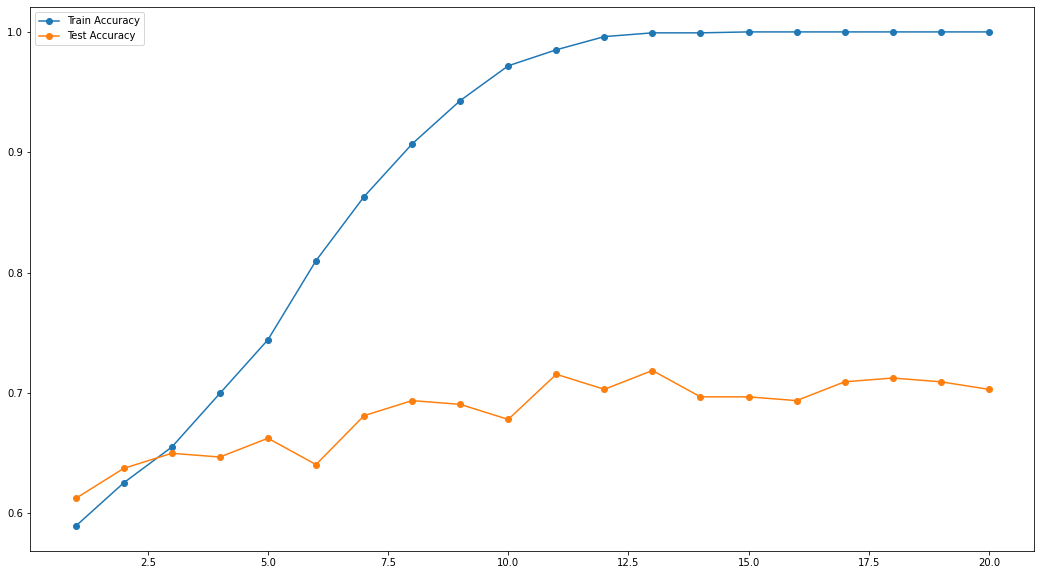

In [28]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

##FITTING CON I VARI MODELLI

In [49]:
# Using simple Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.61875

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7125

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.678125

In [52]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.625

In [53]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.596875

In [54]:
## Build a K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)

0.628125

In [55]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

0.646875

In [56]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_test, y_test)

0.665625

In [57]:
classifiers = [DecisionTreeClassifier(max_depth=4), 
               RandomForestClassifier(n_estimators=200),
               GradientBoostingClassifier(n_estimators=100),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True),
               XGBClassifier()
               ]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

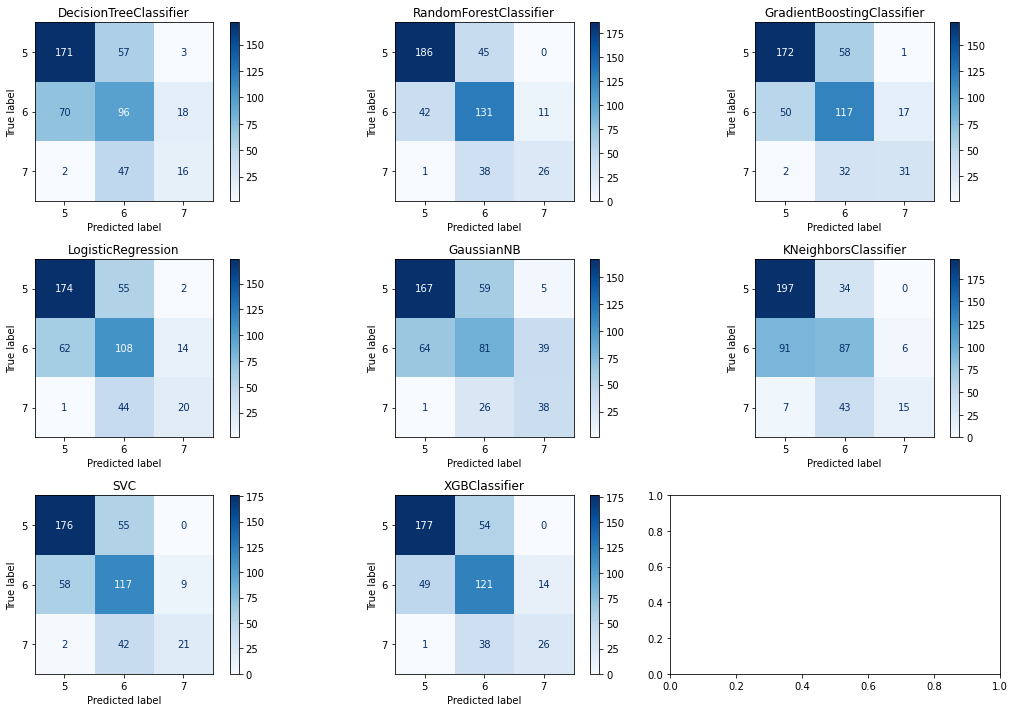

In [62]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['5','6',"7"])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
#plt.show()

In [63]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           5       0.70      0.74      0.72       231
           6       0.48      0.52      0.50       184
           7       0.43      0.25      0.31        65

    accuracy                           0.59       480
   macro avg       0.54      0.50      0.51       480
weighted avg       0.58      0.59      0.58       480

RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

           5       0.81      0.81      0.81       231
           6       0.61      0.71      0.66       184
           7       0.70      0.40      0.51        65

    accuracy                           0.71       480
   macro avg       0.71      0.64      0.66       480
weighted avg       0.72      0.71      0.71       480

GradientBoostingClassifier()
              precision    recall  f1-score   support

           5       0.77      0.74      0.76       231
           6       0.57

In [64]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = LogisticRegression(max_iter=10000)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    f1 = f1_score(y_test, test_y_pred,average='macro')
    featu.append(f1)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, F1: %.3f' % (i, test_acc, f1 ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.592, F1: 0.503
feature selected 3, Acc.Test: 0.579, F1: 0.508
feature selected 4, Acc.Test: 0.621, F1: 0.555
feature selected 5, Acc.Test: 0.625, F1: 0.550
feature selected 6, Acc.Test: 0.619, F1: 0.548
feature selected 7, Acc.Test: 0.621, F1: 0.558
feature selected 8, Acc.Test: 0.615, F1: 0.539
feature selected 9, Acc.Test: 0.619, F1: 0.551
feature selected 10, Acc.Test: 0.631, F1: 0.567

 Best number of feature selection is: 10


##PIPELINE

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [67]:
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=11)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=LogisticRegression(max_iter=1000),
                     n_features_to_select=10)),
                ('classifier',
                 RandomForestClassifier(max_depth=11, random_state=667))])

In [ ]:
input_data = [3,22,1,0,7.25,0,0,1,0,1]

prediction = pipe.predict([input_data])
print(prediction[0])

### Binary Classification ###
if (prediction[0]==0):
  print('Died')
else:
  print('Survived')